#### Hi! I’m Leonardo, an undergraduate Information Systems student with interest in Machine Learning and Data Science. If you’d like to learn more about my work, feel free to check my Linktree: https://linktr.ee/leoantero. Kind regards, Leo

#### For this project I want to implement a linear regression model from scratch using numpy and pandas

In [421]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from sklearn import datasets

# importing all libraries we'll need for this project

In [422]:
# The dataset we're gona use is the Diabetes dataset, from sklearn datasets

data = datasets.load_diabetes()
data.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [423]:
data['feature_names']
# These are the features of the dataset 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [424]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

# Now, with a dataframe, we can start with some exploratory data analysis of the data


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [425]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


The data is a little bit different than we used to see, but it's like this because sklearn datasets are pre-processed and ready to use, this way mathematical models can work better with it.

In [426]:
df.isnull().sum()
# Fortunatelly, there are no null values in the data

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Ok, that's enough for now, let's move on to the next topic.

In [427]:
# The linear regression is based in some functions, they are: Cost function, Gradient Descent

# The cost function calculate the difference between the predicted value and the actual values
# Our goal is to minimize the cost function

def cost_function(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost

    total_cost = cost_sum / (2 * m)
    return total_cost


In [ ]:
# Gradient descent is the algorithm we use to minimize the cost function.

# It works like this: at every iteration we walk in the opposite direction of the gradient, that is, the direction of the steepest descent.

def gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        error = f_wb - y[i]

        dj_db += error
        dj_dw += error * x[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

def gradient_descent(x, y, alpha, num_iters):
    n = x.shape[1]
    b = 0.
    w = np.zeros(n)

    w_history = []
    b_history = []
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient(x, y, w, b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i % 10 == 0:
            w_history.append(w)
            b_history.append(b)
            J_history.append(cost_function(x, y, w, b))

        if i % 1000 == 0:
            cost = cost_function(x, y, w, b)
            print(f"Iteration = {i}: cost = {cost}")

    return w, b, w_history, b_history, J_history

    

In [436]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = df
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_np = x_train.values

learning_rate = 0.33
iterations = 5000

final_w, final_b, w_hist, b_hist, cost_hist = gradient_descent(x_train_np, y_train, learning_rate, iterations)

w_df = pd.DataFrame({'Feature': data.feature_names,
                             'Weight': final_w})
                             
print("\n=== Model Weights ===")

print(w_df.round(4).to_string(index=False))
print(f"\nMean Bias (b): {final_b.mean():.4f}")

Iteration = 0: cost = 8381.760228859204
Iteration = 1000: cost = 1612.0368752612465
Iteration = 2000: cost = 1506.8490151717792
Iteration = 3000: cost = 1484.3383740942063
Iteration = 4000: cost = 1478.5026675774307

=== Model Weights ===
Feature    Weight
    age   36.4681
    sex -245.0950
    bmi  552.6414
     bp  368.1911
     s1 -100.6399
     s2 -108.2329
     s3 -239.0343
     s4  156.1955
     s5  346.6317
     s6   76.0221

Mean Bias (b): 150.8965


As we can see from the cost logs, the model is converging as the cost value consistently decrease over the iterations.

Also, we're able to start seeing some answers from the model weights. Since bmi, bp and s5 has the highest absolute values, it means that these features has the highest impact in the model's predictions.

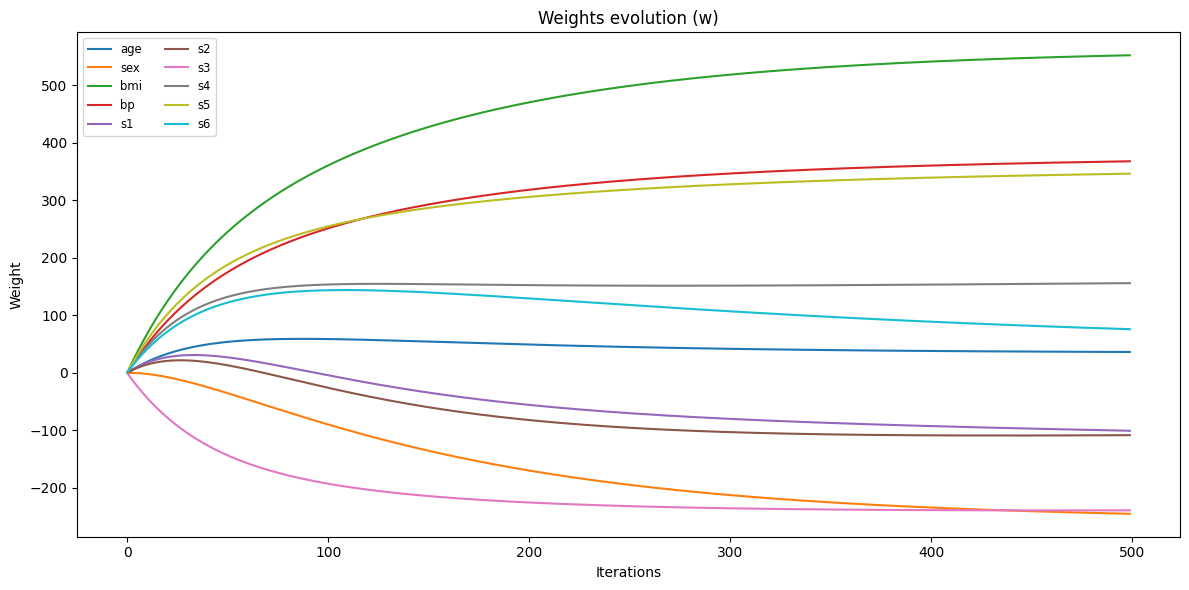

In [430]:
plt.figure(figsize=(12,6))

w_hist_np = np.array(w_hist)
for i in range(w_hist_np.shape[1]):
    plt.plot(w_hist_np[:,i], label=data.feature_names[i])

plt.title("Weights evolution (w)")
plt.xlabel("Iterations")
plt.ylabel("Weight")
plt.legend(loc='upper left', fontsize='small', ncol=2)


plt.tight_layout()
plt.show()

This plot shows the convergence of the weights

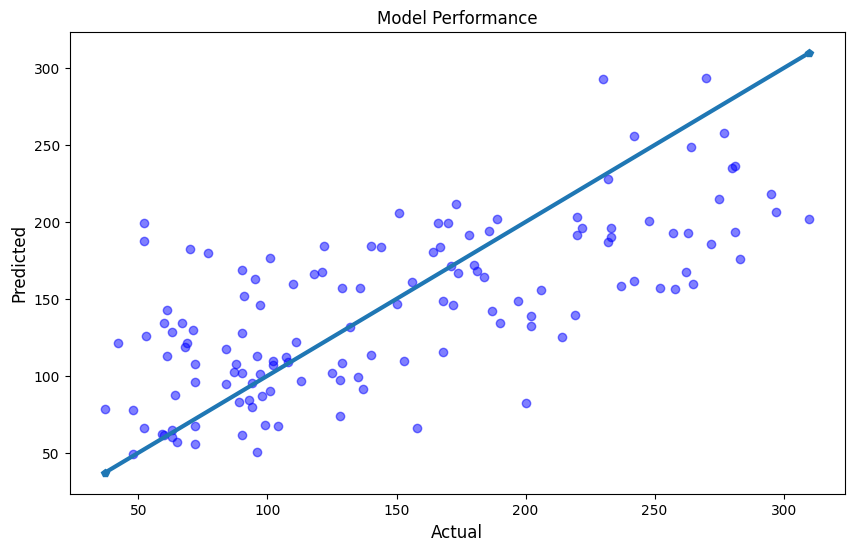

In [449]:
def predict(x, w, b):
    return np.dot(x, w) + b

y_pred = predict(x_test.values, final_w, final_b)

# With the results in hands, let's plot them and see how our model perfomed

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'p-', lw = 3)
plt.xlabel('Actual',fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title("Model Performance")
plt.show()

And this plot evidences the linear relationship between the variables, we could fit a line that best represents the data.

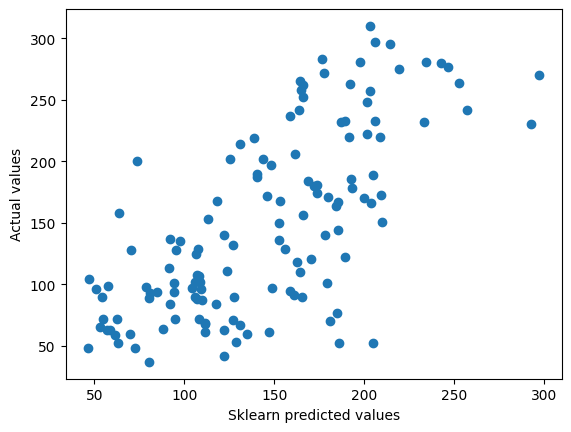

In [450]:
# Fine, let's check the performance of our model compared to the sklearn linear regression model

from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
lm.coef_
lm.intercept_
sklearn_predicted = lm.predict(x_test)
plt.scatter(x = sklearn_predicted, y = y_test)
plt.xlabel("Sklearn predicted values")
plt.ylabel("Actual values")
plt.show()


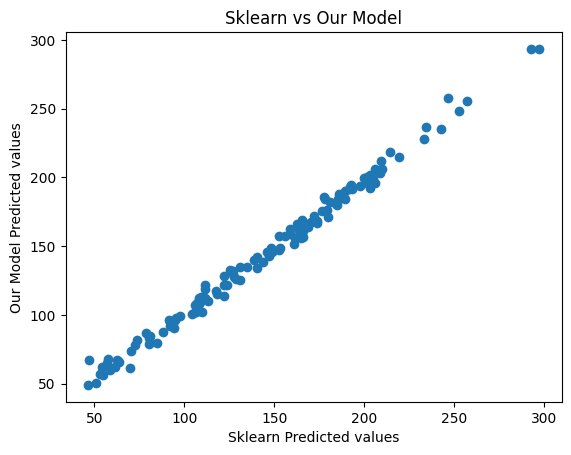

In [434]:
plt.scatter(sklearn_predicted, y_pred)
plt.xlabel("Sklearn Predicted values")
plt.ylabel("Our Model Predicted values")
plt.title("Sklearn vs Our Model")
plt.show()

In [432]:
from sklearn.metrics import mean_absolute_error

def calculate_r2(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

score = calculate_r2(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("--- Leo's Model Perfomance ---")
print(f"R² Score: {score:.4f}")
print(f"Mean aboslute error (MAE): {mae:.4f}")
print("-------------------------")

--- Leo's Model Perfomance ---
R² Score: 0.4814
Mean aboslute error (MAE): 41.8767
-------------------------


In [435]:
score_sklearn = calculate_r2(y_test, sklearn_predicted)
mae_sklearn = mean_absolute_error(y_test, sklearn_predicted)
print("--- Sklearn Model Perfomance ---")
print(f"R² Score: {score_sklearn:.4f}")
print(f"Mean aboslute error (MAE): {mae_sklearn:.4f}")
print("-------------------------")

--- Sklearn Model Perfomance ---
R² Score: 0.4824
Mean aboslute error (MAE): 41.9194
-------------------------


And that's it! As we can see, the model built from scratch performed as well as the scikit-learn model.

Now, I want to make a few final comments:

1. The model made from scratch achieved similar performance to the sklearn model, which is a great result! It proves the implementation was successful and preserved all the model's specifications.

2. It's important to note that this is a simple example. In real-world scenarios, we would need to invest more time in preprocessing, feature engineering, cross-validation, etc.

3. If you're a student or just curious about machine learning, knowing the mathematics behind the model is crucial. It provides the foundation and explanations you need to truly understand how the algorithms work. This knowledge is what allows you to improve performance using techniques like feature engineering, hyperparameter tuning, etc.

Thanks for reading, have a nice day and see you in the next iteration!

#### Best, Leo.